# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [187]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import time
from scipy.stats import linregress
from api_keys import weather_api_key
import datetime
import scipy.stats as st
from scipy.stats import linregress

# Set the seed so our data is reproducible
random.seed(42)

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [188]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [189]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response_json = response.json()
        city_weather = response_json["main"]["temp"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lon"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = response_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp - 273.15,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | loen
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | nouadhibou
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | weno
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | gewane
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | kudat
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | puerto lempira
Processing Record 22 of Set 1 | pekanbaru
Processing Record 23 

In [190]:
# Convert the cities weather data into a Pandas DataFrame
# create a data frame from cities, lat, and temp
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [192]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,7.43,95,100,2.82,TF,1712794702
1,bethel,41.3712,-73.4140,15.08,77,100,2.57,US,1712794558
2,grytviken,-54.2811,-36.5092,0.00,98,67,3.40,GS,1712794705
3,wailua homesteads,22.0669,-159.3780,28.24,63,0,4.63,US,1712794704
4,loen,7.7601,168.2307,27.63,80,79,9.27,MH,1712795199


In [193]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [194]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,7.43,95,100,2.82,TF,1712794702
1,bethel,41.3712,-73.4140,15.08,77,100,2.57,US,1712794558
2,grytviken,-54.2811,-36.5092,0.00,98,67,3.40,GS,1712794705
3,wailua homesteads,22.0669,-159.3780,28.24,63,0,4.63,US,1712794704
4,loen,7.7601,168.2307,27.63,80,79,9.27,MH,1712795199


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

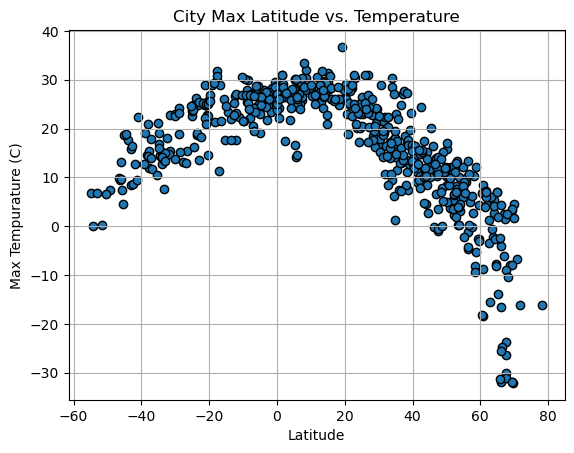

In [195]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid()

# Show plot
plt.show()

#### Latitude Vs. Humidity

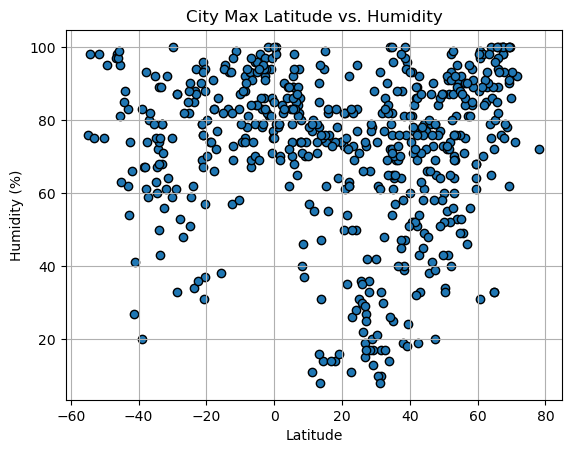

In [196]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity")
plt.grid()

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

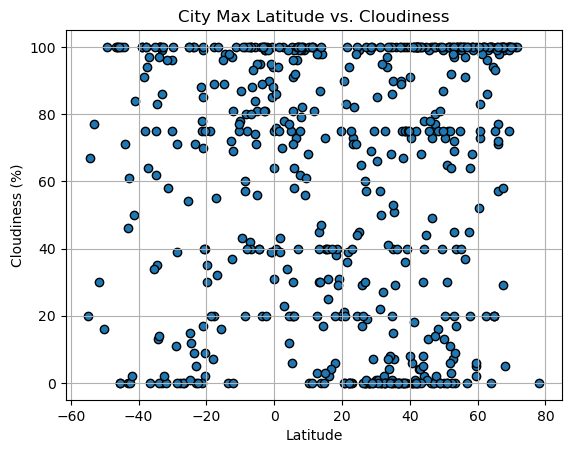

In [197]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness")
plt.grid()

# Show plot
plt.show()
plt.show()

#### Latitude vs. Wind Speed Plot

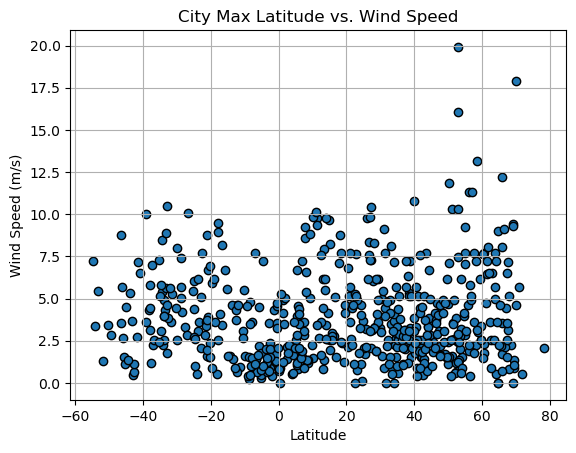

In [198]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed")
plt.grid()

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [199]:
# Define a function to create Linear Regression plots
def lin_reg_func(data, y):
    x_values = data["Lat"]
    y_values = data[y]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print(f"The r-value is: {st.pearsonr(x_values,y_values)[0] ** 2}")

    # making the scatter plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values), max(y_values) - 1),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y}")
    plt.show()

In [200]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,15.08,77,100,2.57,US,1712794558
3,wailua homesteads,22.0669,-159.3780,28.24,63,0,4.63,US,1712794704
4,loen,7.7601,168.2307,27.63,80,79,9.27,MH,1712795199
7,nouadhibou,20.9310,-17.0347,18.99,82,0,5.66,MR,1712794723
8,fortuna,40.5982,-124.1573,16.07,81,0,5.66,US,1712794731


In [201]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,7.43,95,100,2.82,TF,1712794702
2,grytviken,-54.2811,-36.5092,0.00,98,67,3.40,GS,1712794705
5,blackmans bay,-43.0167,147.3167,15.85,62,46,0.45,AU,1712794716
6,adamstown,-25.0660,-130.1015,22.53,82,100,6.06,PN,1712794703
11,ushuaia,-54.8000,-68.3000,6.81,76,20,7.20,AR,1712795200


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7650137910723847


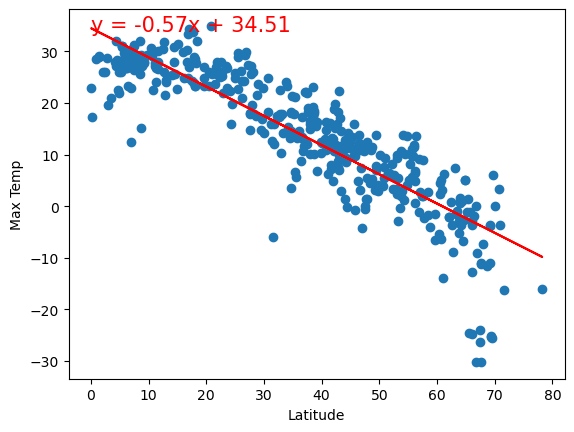

In [179]:
# Linear regression on Northern Hemisphere
lin_reg_func(data = northern_hemi_df, y = "Max Temp")

The r-value is: 0.5117131246558857


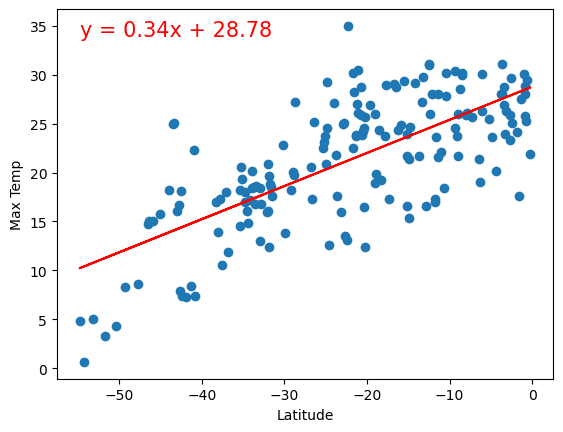

In [180]:
# Linear regression on Southern Hemisphere
lin_reg_func(data = southern_hemi_df, y = "Max Temp")

**Discussion about the linear relationship:** From the northern hemisphere plot, we can see that as the latitude increases the max temp decreases. Where as for the southern hemisphere plot, the max temp increases as the latitude increases. This makes sense because in the northern hemisphere plot when the latitude increases, we are getting farther away from the equator. This indicates that the tempurature is getting colder, which the plot visualizes this negative relationship. The southern plot shows that as we approach the equator, the max temp increases. Based on the R-squared values, thes two relationships are the strongest from all the plots. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04528936738279196


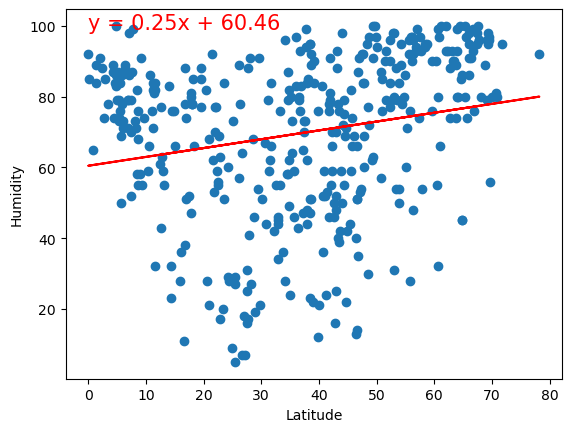

In [181]:
# Northern Hemisphere
lin_reg_func(data = northern_hemi_df, y = "Humidity")

The r-value is: 0.08619334782314654


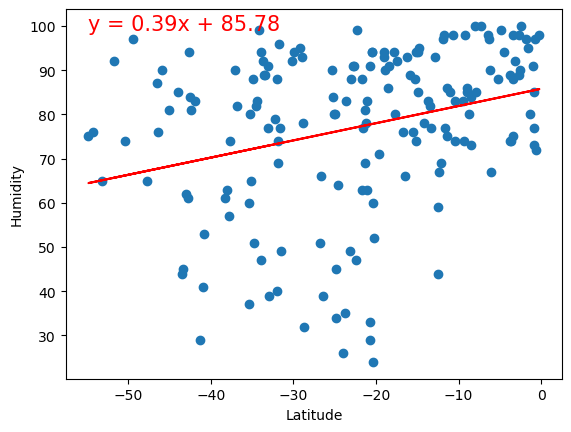

In [182]:
# Southern Hemisphere
lin_reg_func(data = southern_hemi_df, y = "Humidity")

**Discussion about the linear relationship:** Humidity's relationship with latitdude is slightly different compared to max temp. We see the same positive trend in the southern hemisphere, where humidity increases as latitude increases or as we get closer to the equator. The northern hemisphere plot differs in thet as latitude increases, moving away from the equator, humidity increases still. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.004072622758016497


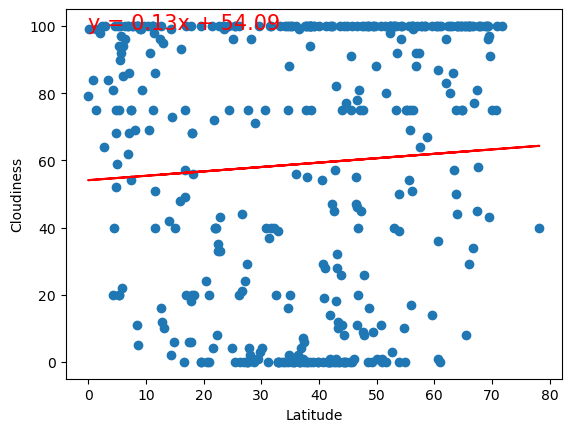

In [183]:
# Northern Hemisphere
lin_reg_func(data = northern_hemi_df, y = "Cloudiness")

The r-value is: 0.053519894789612624


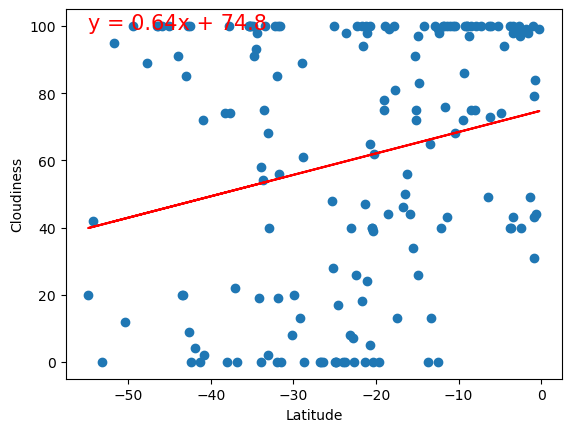

In [184]:
# Southern Hemisphere
lin_reg_func(data = southern_hemi_df, y = "Cloudiness")

**Discussion about the linear relationship:** Latitude and cloudiness have the same relationship as latitude and humidity. For the the southern and northern hemishpere plots, we see that as the latitude increases, the cloudiness increases. For the northern hemisphere, as we get farther from the equator, the cloudier it gets. Where as for the southern hemispher, the closer we get to the equator the cloudier it gets. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.001497135093424631


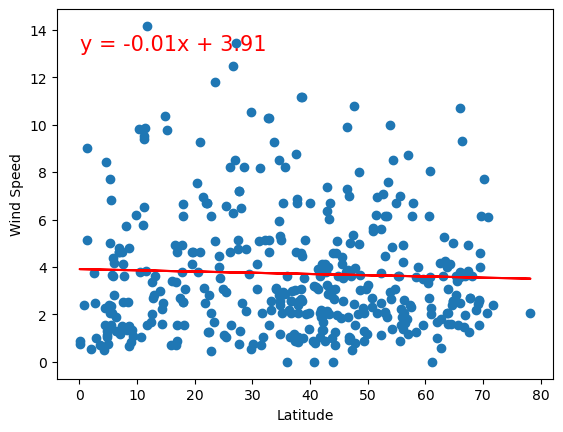

In [185]:
# Northern Hemisphere
lin_reg_func(data = northern_hemi_df, y = "Wind Speed")

The r-value is: 0.15521450206643764


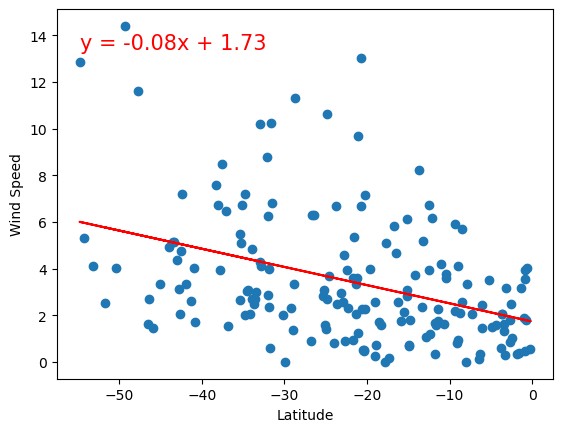

In [186]:
# Southern Hemisphere
lin_reg_func(data = southern_hemi_df, y = "Wind Speed")

**Discussion about the linear relationship:** For the northern hemisphere, as the latitude increases, the wind speed decreases. But with significantly low R-squared value, the relationship here is extremely weak. For the southern hemisphere, as the latitude increases, and as we get closer the the equator, the wind speed decreases. 